In [31]:
import pandas as pd

In [32]:
df = pd.read_csv('airquality_data.csv', encoding='cp1252')

C:\Users\hp\AppData\Local\Temp\ipykernel_6468\2182913842.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airquality_data.csv', encoding='cp1252')


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [34]:
df.isna().sum()


stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [35]:
df=df.drop_duplicates()

In [36]:
df.isna().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149466
type                             5357
so2                             34632
no2                             16222
rspm                            40035
spm                            236908
location_monitoring_station     27303
pm2_5                          425754
date                                7
dtype: int64

In [37]:
percent_missing = df.isna().sum() * 100 / len(df)

In [38]:
percent_missing.sort_values()

state                           0.000000
sampling_date                   0.000690
location                        0.000690
date                            0.001609
type                            1.231302
no2                             3.728613
location_monitoring_station     6.275571
so2                             7.960135
rspm                            9.202010
stn_code                       33.115973
agency                         34.354630
spm                            54.453097
pm2_5                          97.859185
dtype: float64

In [39]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [40]:
numerical_cols = ["so2", "no2", "rspm", "spm", "pm2_5"]


In [41]:
df['location'] = df[categorical_cols].fillna('Unknown')

In [42]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [43]:
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

In [44]:
df[numerical_cols]

,so2,no2,rspm,spm,pm2_5
0,4.8,17.4,90.0,187.0,32.0
1,3.1,7.0,90.0,187.0,32.0
2,6.2,28.5,90.0,187.0,32.0
3,6.3,14.7,90.0,187.0,32.0
4,4.7,7.5,90.0,187.0,32.0
...,...,...,...,...,...
435737,22.0,50.0,143.0,187.0,32.0
435738,20.0,46.0,171.0,187.0,32.0
435739,8.0,22.0,90.0,187.0,32.0
435740,8.0,22.0,90.0,187.0,32.0


In [45]:
df_summary = df.groupby("location")[numerical_cols].mean().reset_index()

In [46]:
df_summary

,location,so2,no2,rspm,spm,pm2_5
0,ANKLESHWAR,18.940120,22.898204,83.868263,187.000000,32.556886
1,Agra,6.461704,19.918637,170.673127,286.509177,32.000000
2,Ahmedabad,14.155741,22.332810,93.763945,206.442273,31.708227
3,Aizawl,3.736762,9.843767,42.540273,148.376894,32.000000
4,Akola,7.992821,9.377436,134.301368,187.000000,32.000000
...,...,...,...,...,...,...
300,Warangal,5.503968,11.754444,53.457143,182.560317,32.000000
301,Wayanad,2.006445,6.012109,36.984375,187.000000,32.000000
302,West Singhbhum,20.947020,30.715232,246.417219,187.000000,32.000000
303,Yamuna Nagar,20.259451,20.204573,125.707317,220.121951,32.000000


In [47]:
def calculate_aqi(row):
    return (row['so2'] * 0.2) + (row['no2'] * 0.3) + (row['rspm'] * 0.5)  # Example formula

df_summary['AQI'] = df_summary.apply(calculate_aqi, axis=1)
df_summary

,location,so2,no2,rspm,spm,pm2_5,AQI
0,ANKLESHWAR,18.940120,22.898204,83.868263,187.000000,32.556886,52.591617
1,Agra,6.461704,19.918637,170.673127,286.509177,32.000000,92.604495
2,Ahmedabad,14.155741,22.332810,93.763945,206.442273,31.708227,56.412964
3,Aizawl,3.736762,9.843767,42.540273,148.376894,32.000000,24.970619
4,Akola,7.992821,9.377436,134.301368,187.000000,32.000000,71.562479
...,...,...,...,...,...,...,...
300,Warangal,5.503968,11.754444,53.457143,182.560317,32.000000,31.355698
301,Wayanad,2.006445,6.012109,36.984375,187.000000,32.000000,20.697109
302,West Singhbhum,20.947020,30.715232,246.417219,187.000000,32.000000,136.612583
303,Yamuna Nagar,20.259451,20.204573,125.707317,220.121951,32.000000,72.966921


In [50]:
print(df_summary.columns)
print(df_summary.dtypes)

Index(['location', 'so2', 'no2', 'rspm', 'spm', 'pm2_5', 'AQI'], dtype='object')
location     object
so2         float64
no2         float64
rspm        float64
spm         float64
pm2_5       float64
AQI         float64
dtype: object


In [51]:
df_summary = df_summary.select_dtypes(include=['number'])


In [55]:
Q1 = df_summary.quantile(0.25)
Q3 = df_summary.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_summary[(df_summary < lower_bound) | (df_summary > upper_bound)]

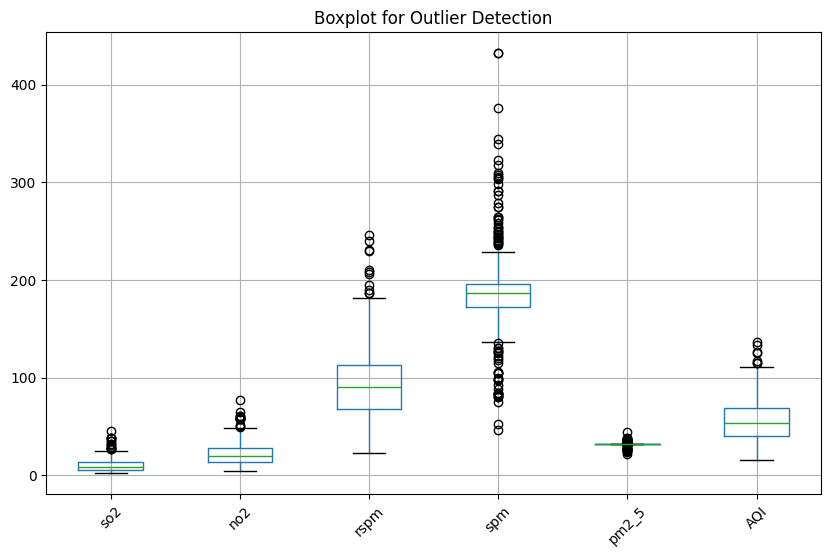

In [53]:
import matplotlib.pyplot as plt

# Plot boxplots for each numerical column
df_summary.select_dtypes(include=['number']).boxplot(figsize=(10, 6))
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()


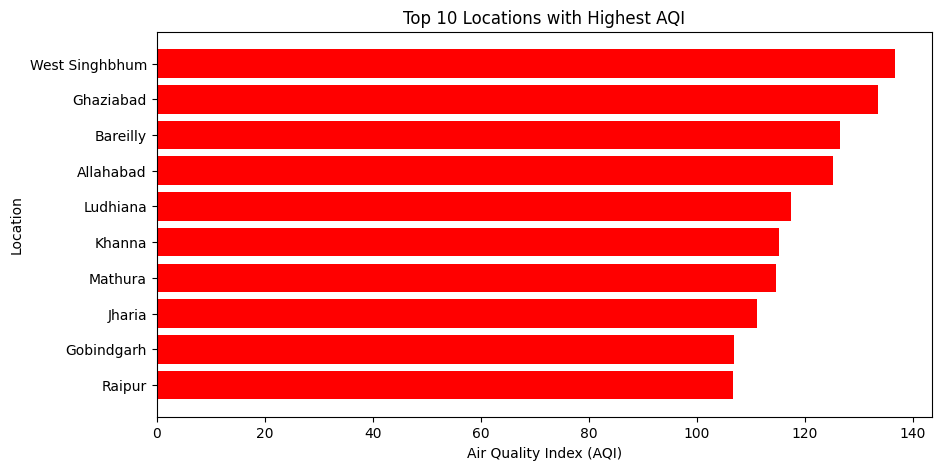

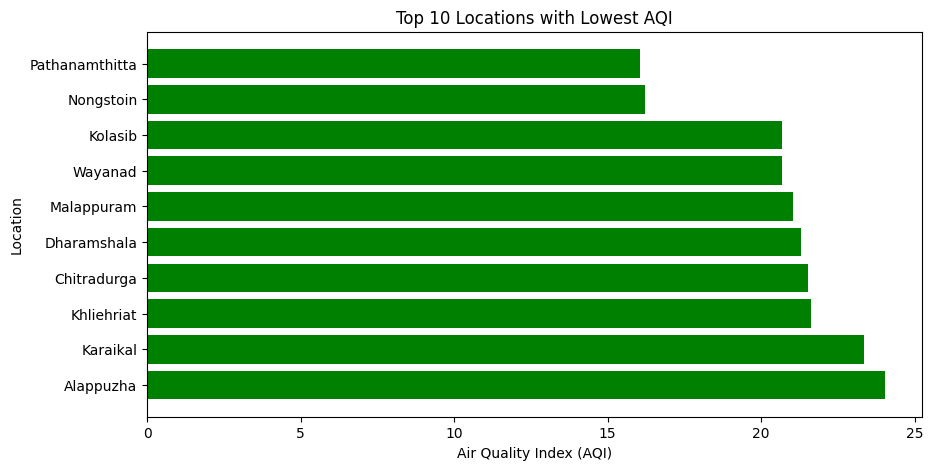

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

df_sorted = df_summary.sort_values(by='AQI', ascending=False)

# Selecting top 10 highest and lowest AQI locations
top_10 = df_sorted.head(10)
bottom_10 = df_sorted.tail(10)

# Plot for highest AQI locations
plt.figure(figsize=(10, 5))
plt.barh(top_10["location"], top_10["AQI"], color='red')
plt.xlabel("Air Quality Index (AQI)")
plt.ylabel("Location")
plt.title("Top 10 Locations with Highest AQI")
plt.gca().invert_yaxis()  # Inverting y-axis to show highest AQI at top
plt.show()

# Plot for lowest AQI locations
plt.figure(figsize=(10, 5))
plt.barh(bottom_10["location"], bottom_10["AQI"], color='green')
plt.xlabel("Air Quality Index (AQI)")
plt.ylabel("Location")
plt.title("Top 10 Locations with Lowest AQI")
plt.show()


In [26]:
numerical_cols.append("AQI") if "AQI" not in numerical_cols else None  

corr_matrix = df_summary[numerical_cols].corr()
aqi_corr = corr_matrix[["AQI"]]
print(aqi_corr)

            AQI
so2    0.484809
no2    0.635992
rspm   0.983569
spm    0.508845
pm2_5  0.189012
AQI    1.000000


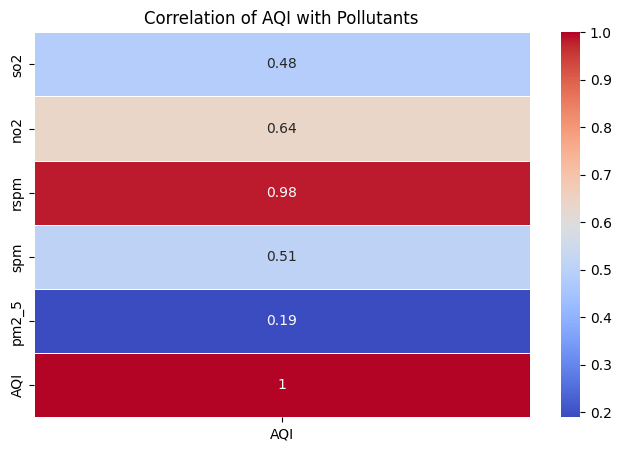

In [27]:
plt.figure(figsize=(8, 5))

sns.heatmap(aqi_corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation of AQI with Pollutants")
plt.show()


In [28]:
# AQI categories
def categorize_aqi(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Moderate"
    elif aqi <= 150:
        return "Unhealthy for Sensitive Groups"
    elif aqi <= 200:
        return "Unhealthy"
    elif aqi <= 300:
        return "Very Unhealthy"
    else:
        return "Hazardous"

df_summary["AQI_Category"] = df_summary["AQI"].apply(categorize_aqi)


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = df_summary[["so2", "no2", "rspm", "spm", "pm2_5"]]
y = df_summary["AQI_Category"]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model Training
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Result
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9836065573770492
